In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

# Load data

In [2]:
df = pd.read_pickle("../../data/preprocessed/stemm_lemm_stop_words.pkl")

In [3]:
df.head()

,Facebook Id,Post Created,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Message_stpWrd,Message_clean_stpWrd,Message_clean_stemm_stpWrd,Message_clean_lemm_stpWrd
0,100069920850250,2017-12-31 23:43:00 CST,18,16,0,2,0,0,0,0,0,0,Mitigar cambio climático pies tierra. http://r...,mitigar cambio climatico pies tierra,mitig cambi climat pies tierr,mitigar cambio climatico pie tierra
1,100064929514903,2017-12-31 23:00:11 CST,3,3,0,0,0,0,0,0,0,0,#México 🇲🇽 | Ciudad México urbe Latinoamérica ...,mexico ciudad mexico urbe latinoamerica busca ...,mexic ciud mexic urbe latinoamer busc siguient...,mexico ciudad mexico urbe latinoamerica buscar...
2,100063648342761,2017-12-31 21:57:39 CST,115,68,33,3,11,0,0,0,0,0,"2018 comienza deseo corazón hagan disfruten, p...",2018 comienza deseo corazon hagan disfruten ma...,par 2018 comienz dese corazon hag tod disfrut ...,2018 comenzar desear corazon disfrutar mas aun...
3,100067009789858,2017-12-31 20:41:50 CST,5,2,0,1,0,0,0,1,1,0,"ONU lanza alerta roja 2018 armas nucleares, vi...",onu lanza alerta roja 2018 armas nucleares vio...,onu lanz alert roj par 2018 armas nuclear viol...,onu lanzar alerta rojo 2018 arma nuclear viola...
4,530019227057516,2017-12-31 20:30:00 CST,31,21,0,3,1,4,1,0,1,0,Novedoso proyecto busca instalar paneles solar...,novedoso proyecto busca instalar paneles solar...,noved proyect busc instal panel solar lun par ...,novedoso proyecto buscar instalar panel solar ...


En este notebook analizaremos siguientes variables:
- `Message_stpWrd`
- `Message_clean_stpWrd`
- `Message_clean_stemm_stpWrd`
- `Message_clean_lemm_stpWrd`

Específicamente: `Message_clean_lemm_stpWrd`

In [4]:
df[['Message_stpWrd', 'Message_clean_stpWrd', 
    'Message_clean_stemm_stpWrd', 'Message_clean_lemm_stpWrd']].head()

,Message_stpWrd,Message_clean_stpWrd,Message_clean_stemm_stpWrd,Message_clean_lemm_stpWrd
0,Mitigar cambio climático pies tierra. http://r...,mitigar cambio climatico pies tierra,mitig cambi climat pies tierr,mitigar cambio climatico pie tierra
1,#México 🇲🇽 | Ciudad México urbe Latinoamérica ...,mexico ciudad mexico urbe latinoamerica busca ...,mexic ciud mexic urbe latinoamer busc siguient...,mexico ciudad mexico urbe latinoamerica buscar...
2,"2018 comienza deseo corazón hagan disfruten, p...",2018 comienza deseo corazon hagan disfruten ma...,par 2018 comienz dese corazon hag tod disfrut ...,2018 comenzar desear corazon disfrutar mas aun...
3,"ONU lanza alerta roja 2018 armas nucleares, vi...",onu lanza alerta roja 2018 armas nucleares vio...,onu lanz alert roj par 2018 armas nuclear viol...,onu lanzar alerta rojo 2018 arma nuclear viola...
4,Novedoso proyecto busca instalar paneles solar...,novedoso proyecto busca instalar paneles solar...,noved proyect busc instal panel solar lun par ...,novedoso proyecto buscar instalar panel solar ...


In [5]:
df[['Message_stpWrd', 'Message_clean_stpWrd', 
    'Message_clean_stemm_stpWrd', 'Message_clean_lemm_stpWrd']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 87422 entries, 0 to 87442
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Message_stpWrd              87422 non-null  object
 1   Message_clean_stpWrd        87422 non-null  object
 2   Message_clean_stemm_stpWrd  87422 non-null  object
 3   Message_clean_lemm_stpWrd   87422 non-null  object
dtypes: object(4)
memory usage: 3.3+ MB


In [6]:
facebook_post_clean = df['Message_clean_lemm_stpWrd'].values.tolist()

# Tokenize

In [7]:
from tqdm import tqdm

Gracias a que nuesto texto a analizar (`Message_clean_lemm_stpWrd`) ya fue preprocesado obtendremos los respectivos tokens para cada mensaje. Recordemos que para este proyecto los tokens representan palabras individuales, pero en la práctica no es así.

Para más información se sugiere revisar el siguiente [link](https://help.openai.com/en/articles/4936856-what-are-tokens-and-how-to-count-them).

In [8]:
%time
tokens_spacy = []
for post in tqdm(facebook_post_clean):
    token_i = [token for token in post.split(' ')]
    tokens_spacy.append(token_i)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 11 µs


100%|██████████| 87422/87422 [00:01<00:00, 69983.52it/s]


In [9]:
for i in tokens_spacy[:5]:
    print(i)

['mitigar', 'cambio', 'climatico', 'pie', 'tierra']
['mexico', 'ciudad', 'mexico', 'urbe', 'latinoamerica', 'buscar', 'generacion', 'mujer', 'lider']
['2018', 'comenzar', 'desear', 'corazon', 'disfrutar', 'mas', 'aun', 'disfrutar', 'repartir', 'amor', 'humano', 'comunidad', 'vivo', 'terrible', 'calentamiento', 'global', 'aun', 'mas', 'serio', 'calentamiento', 'social', 'violencia', 'odio', 'muerte', 'exclusión', 'anular', 'mas', 'denso', 'amorosfera', 'energia', 'amor', 'presente', 'actuante', 'continuo', 'expansion', 'solidaridad', 'amor', 'universal', 'presente', 'esperanza', '2018', 'carino', 'victor', 'quintana']
['onu', 'lanzar', 'alerta', 'rojo', '2018', 'arma', 'nuclear', 'violacion', 'dh', 'cambio', 'climatico', 'unidad', 'camino', 'insistio', 'secretario', 'futuro', 'depender']
['novedoso', 'proyecto', 'buscar', 'instalar', 'panel', 'solar', 'luna', 'abastecer', 'energia', 'planeta', 'tierra']


In [10]:
print(f"Hay un total de {len(tokens_spacy)} mensajes.")

Hay un total de 87422 mensajes.


# Dictionary

Recordemos que LDA se basa de:
- **Dictionary**: conjunto de palabras únicas.
- **Corpus**: frecuencia de palabras (BoW).

In [11]:
dictionary = Dictionary(tokens_spacy)

In [12]:
len(dictionary)

114838

Hay un total de $114,838$ IDs únicos, de los cuales filtraremos por su frecuencia:
- `no_below`: nos quedaremos con aquellos IDs que aparecen en al menos 10 mensajes.
- `no_above`: este parámetro es útil para filtrar aquellos IDs que aparecen una gran cantidad de veces en los mensajes. Debe ser un porcentaje (i.e. $\in [0,1]$). Esto puede ayudar a filtrar **Stop-words**, lo cual ya se realizó previamente en la parte de preprocesamiento y limpieza del texto.

In [13]:
dictionary.filter_extremes(
    no_below=10,
    no_above=1.0,
)

In [14]:
len(dictionary)

16382

Una vez que se ha filtrado los IDs queda un total de $16,382$ IDs únicos.

# Corpus

El corpus consiste en un conjunto de tuplas, donde cada una representa:
- (`id`, `freq en msj`)

In [15]:
corpus = [dictionary.doc2bow(doc) for doc in tokens_spacy]

Por ejemplo:

In [16]:
print(corpus[0])
print(tokens_spacy[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]
['mitigar', 'cambio', 'climatico', 'pie', 'tierra']


El primer elemento de la tupla representa el ID asociado a cada token (palabra), mientras que el segundo elemento de la tupla representa la frecuencia del ID (token) en el mensaje. Por ejemplo en el mensaje sintético:
- cambio cambio cambio cambio cambio

Debería indicar que "cambio" apareció 5 veces:

In [17]:
dictionary.doc2bow(["cambio"]*5)

[(0, 5)]

# LDA - How many topics?

En el notebook anterior analizamos el modelo **LDA** dados 10 tópicos. En esta nueva sección analizaremos el número "óptimo" de tópicos.

Para obtener el número "óptimo" de tópicos existen varias reglas heurísticas. Las que utilizaremos en este proyecto es:
- u_mass
- Coherence Score

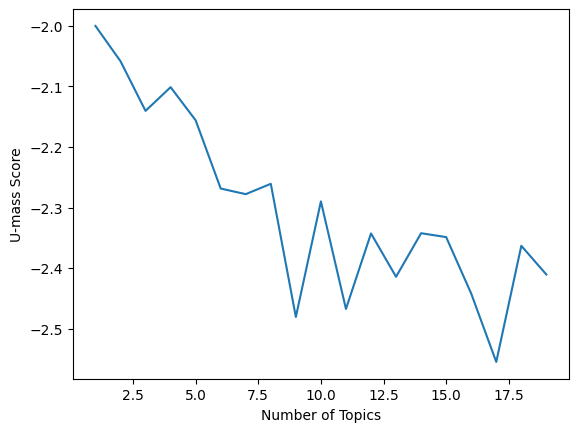

CPU times: user 14min 28s, sys: 1min 26s, total: 15min 55s
Wall time: 43min 48s


<Figure size 640x480 with 0 Axes>

In [18]:
%%time
topics = []
score = []
for n_topics in range(1,20,1):
    lda_model = LdaMulticore(
        corpus=corpus, 
        id2word=dictionary, 
        iterations=10, 
        num_topics=n_topics,
        workers=4, 
        passes=10, 
        random_state=42
    )
    cm = CoherenceModel(
        model=lda_model, 
        texts=tokens_spacy, 
        corpus=corpus, 
        dictionary=dictionary, 
        coherence='u_mass'
    )
    topics.append(n_topics)
    score.append(cm.get_coherence())

_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('U-mass Score')
plt.show()
plt.savefig("../images/08-notebook/umass_score_ntopics.png")

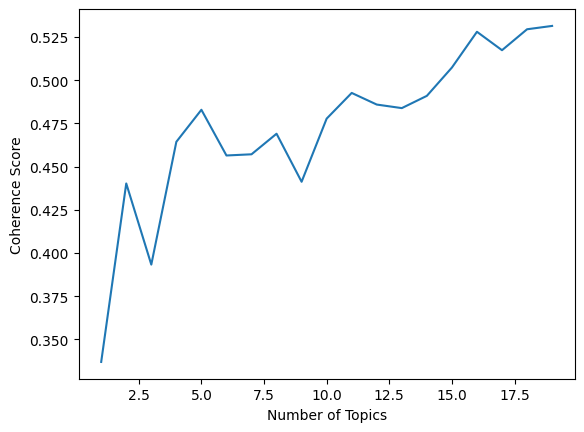

CPU times: user 15min 23s, sys: 1min 38s, total: 17min 1s
Wall time: 1h 41s


<Figure size 640x480 with 0 Axes>

In [19]:
%%time
topics = []
score = []
for n_topics in range(1,20,1):
    lda_model = LdaMulticore(
        corpus=corpus, 
        id2word=dictionary, 
        iterations=10, 
        num_topics=n_topics,
        workers=4, 
        passes=10, 
        random_state=42
    )
    cm = CoherenceModel(
        model=lda_model, 
        texts=tokens_spacy, 
        corpus=corpus, 
        dictionary=dictionary, 
        coherence='c_v'
    )
    topics.append(n_topics)
    score.append(cm.get_coherence())

_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()
plt.savefig("../images/08-notebook/coherence_score_ntopics.png")